In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('C:\\Users\\Srikrishnaa\\Documents\\Future\\career in data science\\code dump\\python\\Flight Price Predictor\\EMT_flight_price_data.csv')
data.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0
3,26135ec458c4204ddf036eae4119dd90,2020-02-01 00:33:23 +0000,Nagpur,Mumbai,Goa,NaN,Pune,Air India|Air India|Air India,AI-630|AI-33|AI-9562,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0
4,c29198e6745d72220af30969f05a7841,2020-01-01 00:18:01 +0000,Mumbai,Hyderabad,NaN,NaN,Varanasi,Indigo|Indigo,6E-5384|6E-915,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0


In [3]:
len(data)

30024

In [4]:
for i in range(len(data)):
    if type(data['Layover1'].iloc[i]) is float:
        data['Layover1'].iloc[i] = '<None>'
    if type(data['Layover2'].iloc[i]) is float:
        data['Layover2'].iloc[i] = '<None>'
    if type(data['Layover3'].iloc[i]) is float:
        data['Layover3'].iloc[i] = '<None>'


C:\Users\Srikrishnaa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
departure_dt = []
arrival_dt = []

for i in range(len(data)):
    dd = data['Departure Date'].iloc[i][:2] + ' ' + data['Departure Date'].iloc[i][2:5] + ' ' + data['Departure Date'].iloc[i][5:] + ' ' + data['Departure Time'].iloc[i]
    aa = data['Arrival Date'].iloc[i][:2] + ' ' + data['Arrival Date'].iloc[i][2:5] + ' ' + data['Arrival Date'].iloc[i][5:] + ' ' + data['Arrival Time'].iloc[i]
    departure_dt.append(datetime.strptime(dd,"%d %b %Y %H:%M"))
    arrival_dt.append(datetime.strptime(aa,"%d %b %Y %H:%M"))
    
data['Departure datetime'] = np.array(departure_dt)
data['Arrival datetime'] = np.array(arrival_dt)
data.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Departure datetime,Arrival datetime
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,<None>,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,2020-02-06 22:45:00,2020-02-07 19:10:00
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,<None>,<None>,<None>,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,2020-02-01 15:45:00,2020-02-01 17:25:00
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,<None>,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,2020-01-23 09:40:00,2020-01-24 07:00:00
3,26135ec458c4204ddf036eae4119dd90,2020-02-01 00:33:23 +0000,Nagpur,Mumbai,Goa,<None>,Pune,Air India|Air India|Air India,AI-630|AI-33|AI-9562,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0,2020-02-03 21:10:00,2020-02-04 14:45:00
4,c29198e6745d72220af30969f05a7841,2020-01-01 00:18:01 +0000,Mumbai,Hyderabad,<None>,<None>,Varanasi,Indigo|Indigo,6E-5384|6E-915,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0,2020-01-06 00:50:00,2020-01-06 10:05:00


In [6]:
#Missed space between h and m in Total time column
missed_space_inds = []
for i in range(len(data)):
    k = data['Total Time'].iloc[i].split(' ')
    if len(k) != 2:
        #print(i,k)
        missed_space_inds.append(i)

In [7]:
#Adding a space between h and m for those data points
for i in missed_space_inds:
    splits = data['Total Time'].iloc[i].split('h')
    data['Total Time'].iloc[i] = splits[0] + 'h' + ' ' + splits[1]

C:\Users\Srikrishnaa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
#Verifying if rectified
for i in missed_space_inds[:5]:
    print(data['Total Time'].iloc[i])

02h 55m
05h 05m
05h 05m
04h 35m
04h 35m


In [9]:
#Converting time difference into minutes and integer type
del_t = []
for i in range(len(data)):
    timediff = data['Total Time'].iloc[i].split(' ')
    h = int(timediff[0][:-1])
    m = int(timediff[1][:-1])
    del_t.append(h*60+m)
data['Time Taken'] = del_t

In [10]:
#Converting crawltime to datetime format 

data['Crawl Timestamp'] = list(map(lambda x:x[:-6],data['Crawl Timestamp']))
data['Crawl Timestamp'].iloc[:5]

0    2020-02-01 00:46:15
1    2020-01-13 13:29:00
2    2020-01-01 00:35:50
3    2020-02-01 00:33:23
4    2020-01-01 00:18:01
Name: Crawl Timestamp, dtype: object

In [11]:
#and calculating the difference between crawl time and departure time (in days)
crawl_dt = []
for i in range(len(data)):
    crawl_dt.append(datetime.strptime(data['Crawl Timestamp'].iloc[i],"%Y-%m-%d %H:%M:%S"))
    
data['Crawl Timestamp'] = crawl_dt
data['Crawl Timestamp'].iloc[:5]

0   2020-02-01 00:46:15
1   2020-01-13 13:29:00
2   2020-01-01 00:35:50
3   2020-02-01 00:33:23
4   2020-01-01 00:18:01
Name: Crawl Timestamp, dtype: datetime64[ns]

In [12]:
data['Crawl_Dep_Days'] = data['Departure datetime'] - data['Crawl Timestamp']
data['Crawl_Dep_Days'] = list(map(lambda x:int(x.days),data['Crawl_Dep_Days']))
data['Crawl_Dep_Days'].iloc[:5]

0     5
1    19
2    22
3     2
4     5
Name: Crawl_Dep_Days, dtype: int64

In [13]:
s_d = []
s_l1 = []
l1_d = []
l1_l2 = []
l2_d = []
l2_l3 = []
l3_d = []

for i in range(len(data)):
    carriers = data['Flight Operator'].iloc[i].split('|')
    if len(carriers) == 1:
        s_d.append(carriers[0])
        s_l1.append('<None>')
        l1_d.append('<None>')
        l1_l2.append('<None>')
        l2_d.append('<None>')
        l2_l3.append('<None>')
        l3_d.append('<None>')
    
    elif len(carriers) == 2:
        s_d.append('<None>')
        s_l1.append(carriers[0])
        l1_d.append(carriers[1])
        l1_l2.append('<None>')
        l2_d.append('<None>')
        l2_l3.append('<None>')
        l3_d.append('<None>')
    
    elif len(carriers) == 3:
        s_d.append('<None>')
        s_l1.append(carriers[0])
        l1_d.append('<None>')
        l1_l2.append(carriers[1])
        l2_d.append(carriers[2])
        l2_l3.append('<None>')
        l3_d.append('<None>')
        
    elif len(carriers) == 4:
        s_d.append('<None>')
        s_l1.append(carriers[0])
        l1_d.append('<None>')
        l1_l2.append(carriers[1])
        l2_d.append('<None>')
        l2_l3.append(carriers[2])
        l3_d.append(carriers[3])
    
    else:
        pass

data['S-D'] = s_d
data['S-L1'] = s_l1
data['L1-D'] = l1_d
data['L1-L2'] = l1_l2
data['L2-D'] = l2_d
data['L2-L3'] = l2_l3
data['L3-D'] = l3_d

In [14]:
flight_carriers = list(set(s_d+s_l1+l1_d+l1_l2+l2_d+l2_l3+l3_d))
flight_carriers = [str(i) for i in flight_carriers]
flight_carriers.sort()

In [15]:
cities = list(set(list(data['Source'])+list(data['Layover1'])+list(data['Layover2'])+list(data['Layover3'])+list(data['Destination'])))
cities = [str(i) for i in cities]
cities.sort()

In [16]:
#Dropping columns
drop_cols = ['Departure Date',
             'Departure Time',
             'Arrival Date',
             'Arrival Time',
             'Total Time',
             'Uniq Id',
             'Crawl Timestamp',
             'Flight Number',
             'Flight Operator'
            ]
data.drop(drop_cols,axis=1,inplace=True)

In [17]:
#Converting departure and arrival datetimes to appropriate feature variables
data['Departure datetime'] = pd.to_datetime(data['Departure datetime'])
data['Arrival datetime'] = pd.to_datetime(data['Arrival datetime'])

In [18]:
data['Departure Month'] = data['Departure datetime'].dt.month
data['Departure Week'] = data['Departure datetime'].dt.isocalendar().week
data['Departure Hour'] = data['Departure datetime'].dt.hour
data['Departure Minute'] = data['Departure datetime'].dt.minute
data['Departure Dayofweek'] = data['Departure datetime'].dt.dayofweek

data['Arrival Month'] = data['Arrival datetime'].dt.month
data['Arrival Week'] = data['Arrival datetime'].dt.isocalendar().week
data['Arrival Hour'] = data['Arrival datetime'].dt.hour
data['Arrival Minute'] = data['Arrival datetime'].dt.minute
data['Arrival Dayofweek'] = data['Arrival datetime'].dt.dayofweek

data.drop(['Departure datetime','Arrival datetime'],axis=1,inplace=True)

In [21]:
cat_vars = [
    'Source',
    'Layover1',
    'Layover2',
    'Layover3',
    'Destination',
    'S-D',
    'S-L1',
    'L1-D',
    'L1-L2',
    'L2-D',
    'L2-L3',
    'L3-D'
]
ord_vars = [
    'Number Of Stops',
    'Departure Month',
    'Departure Week',
    'Departure Hour',
    'Departure Minute',
    'Departure Dayofweek',
    'Arrival Month',
    'Arrival Week',
    'Arrival Hour',
    'Arrival Minute',
    'Arrival Dayofweek',
    'Crawl_Dep_Days'
]
num_vars = ['Time Taken']

features = cat_vars + ord_vars + num_vars
label = ['Fare']
data = data[features+label]

data.head()

,Source,Layover1,Layover2,Layover3,Destination,S-D,S-L1,L1-D,L1-L2,L2-D,...,Departure Minute,Departure Dayofweek,Arrival Month,Arrival Week,Arrival Hour,Arrival Minute,Arrival Dayofweek,Crawl_Dep_Days,Time Taken,Fare
0,Dubai,Muscat,Delhi,<None>,Kolkata,<None>,Oman Air,<None>,Oman Air,Air India,...,45,3,2,6,19,10,4,5,1135,26224.0
1,Delhi,<None>,<None>,<None>,Patna,SpiceJet,<None>,<None>,<None>,<None>,...,45,5,2,5,17,25,5,19,100,2889.0
2,Mumbai,Raipur,Kolkata,<None>,Silchar,<None>,Air India,<None>,Air India,Air India,...,40,3,1,4,7,0,4,22,1280,13518.0
3,Nagpur,Mumbai,Goa,<None>,Pune,<None>,Air India,<None>,Air India,Air India,...,10,0,2,6,14,45,1,2,1055,12528.0
4,Mumbai,Hyderabad,<None>,<None>,Varanasi,<None>,Indigo,Indigo,<None>,<None>,...,50,0,1,2,10,5,0,5,555,8240.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data[features],data[label],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=4242)

In [24]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(data[cat_vars])

X_train_cat_vars = pd.DataFrame(encoder.transform(X_train[cat_vars]))
X_test_cat_vars = pd.DataFrame(encoder.transform(X_test[cat_vars]))

In [25]:
cat_vars_cols = X_train_cat_vars.columns

X_train_cat_vars = np.array(X_train_cat_vars)
X_train_ord_num_vars = np.array(X_train[ord_vars+num_vars])

X_train = pd.DataFrame(data=np.concatenate((X_train_cat_vars,X_train_ord_num_vars),axis=1),
                      columns = list(cat_vars_cols)+ord_vars+num_vars)

In [26]:
X_test_cat_vars = np.array(X_test_cat_vars)
X_test_ord_num_vars = np.array(X_test[ord_vars+num_vars])

X_test = pd.DataFrame(data=np.concatenate((X_test_cat_vars,X_test_ord_num_vars),axis=1),
                      columns = list(cat_vars_cols)+ord_vars+num_vars)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[ord_vars+num_vars] = scaler.fit_transform(np.array(X_train[ord_vars+num_vars]))
#X_train[num_vars] = scaler.fit_transform(np.array(X_train[num_vars]))


In [28]:
X_test[ord_vars+num_vars] = scaler.transform(np.array(X_test[ord_vars+num_vars]))
#X_test[num_vars] = scaler.transform(np.array(X_test[num_vars]))


In [29]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\Srikrishnaa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Srikrishnaa\AppData\Local\Temp/ipykernel_8080/2751168992.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [30]:
predictions = reg_rf.predict(np.array(X_test))

predictions = predictions.reshape(len(predictions))
pred_act_dict = {'predicted':predictions, 'actual':np.array(y_test).reshape(len(y_test))}
pred_act = pd.DataFrame(pred_act_dict)

In [31]:
print(min(pred_act['predicted']),min(pred_act['actual']))

2107.25 1658.0


In [32]:
print(max(pred_act['predicted']),max(pred_act['actual']))

477090.5 733314.0


In [33]:
#Arbitrary constraint: If flight cost < 0 and flight cost > 20lakh the predictor fails 
failed_cases = pred_act[(pred_act['predicted'] < 0) | (pred_act['predicted'] > 2000000)]
perc_failed_cases = len(failed_cases)*100/len(pred_act)
print("Percentage of failed predictions: {:.2f}%".format(perc_failed_cases))
pred_act_success = pred_act[(pred_act['predicted'] > 0) & (pred_act['predicted'] < 2000000)]

Percentage of failed predictions: 0.00%


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
print("Root Mean squared error: {:.2f}".format(mean_squared_error(pred_act_success['predicted'],pred_act_success['actual'],squared=False)))
print("Mean absolute error: {:.2f}".format(mean_absolute_error(pred_act_success['predicted'],pred_act_success['actual'])))
print("R2 score: {:.2f}".format(r2_score(pred_act_success['predicted'],pred_act_success['actual'])))

Root Mean squared error: 22437.70
Mean absolute error: 9235.30
R2 score: 0.68


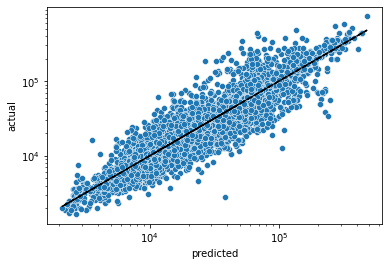

In [36]:
fig,ax = plt.subplots()
sns.scatterplot(data=pred_act_success,x='predicted',y='actual',ax=ax)
ax.plot(pred_act_success['predicted'],pred_act_success['predicted'],'k--')
ax.set_xscale('log')
ax.set_yscale('log')

In [37]:
import pickle
model_filename = 'flight_price_regression'
scaler_filename = 'feature_scaler'
encoder_filename = 'one_hot_encoder'

with open(model_filename,'wb') as f:
    pickle.dump(reg_rf,f)

with open(scaler_filename,'wb') as f:
    pickle.dump(scaler,f)

with open(encoder_filename,'wb') as f:
    pickle.dump(encoder,f)

In [38]:
cities_filename = 'cities.txt'
carriers_filename = 'flight_carriers.txt'
input_feat_filename = 'features.txt'
cat_filename = 'categorical.txt'
ord_filename = 'ordinal.txt'
num_filename = 'numerical.txt'

with open(cities_filename,'w') as f:
    for item in cities:
        f.write("{}\n".format(item))

with open(carriers_filename,'w') as f:
    for item in flight_carriers:
        f.write("{}\n".format(item))

with open(input_feat_filename,'w') as f:
    for item in features:
        f.write("{}\n".format(item))

with open(cat_filename,'w') as f:
    for item in cat_vars:
        f.write("{}\n".format(item))

with open(ord_filename,'w') as f:
    for item in ord_vars:
        f.write("{}\n".format(item))

with open(num_filename,'w') as f:
    for item in num_vars:
        f.write("{}\n".format(item))